# Importando las librerías necesarias

In [3]:
import pandas as pd                                          # Para el manejo del dataset
import numpy as np                                           # Para el manejo del dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # Para vectorizar
from sklearn.neighbors import NearestNeighbors               # Para crear el modelo

In [4]:
from tabulate import tabulate                                # Para mostrar el resultado en una tabla

In [5]:
import nltk                                                  # Para preprocesar los datos
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
# Descargar las stopwords y el lematizador de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
!pip install googletrans==4.0.0-rc1

In [8]:
from googletrans import Translator                 # Para traducir la información final

In [9]:
!pip install fuzzywuzzy

In [10]:
#librerías para guadar las recomendaciones
import os

In [11]:
#Librerías para las imagenes
from PIL import Image
from IPython.display import display

# Analisando el dataset

In [12]:
# Cargar el dataset original con todas las columnas
df_original = pd.read_csv('5000_doramas.csv')

In [13]:
# Mostrar las 10 primeras filas
df_original.head(10)

,id,name,content,no_of_reviews,no_of_viewers,aka_names,screenwriter,director,genres,tags,...,main_role,support_role,no_of_extracted_reviews,Total_sentences,POSITIVE_people_sentiment,POSITIVE_sentences,NEGATIVE_people_sentiment,NEGATIVE_sentences,reviewer_location_info,reviewer_gender_info
0,0,goblin,Kim Shin was once an unbeatable general in Gor...,464.0,198650.0,"쓸쓸하고 찬란하神-도깨비 , Dokkaebi , Sseulsseulhago Chal...",Kim Eun Sook,Lee Eung Bok,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",...,"Gong Yoo, Kim Go Eun, Lee Dong Wook, Yoo In Na...","Lee El, Kim Sung Kyum, Kim Byung Chul, Jo Woo...",422,6390,grim reaper - (sunny; bromance; shin; relation...,3226.0,"age gap - (lead; issue), grim reaper - (sunny)...",1331.0,"Counter({'': 238, 'usa': 14, 'united states': ...","Counter({'female': 318, '': 59, 'male': 44})"
1,1,strong woman do bong soon,"Do Bong Soon is a petite, unemployed woman who...",345.0,184710.0,"Himsseonyeoja Dobongsun , Powerful Woman Do Bo...",Baek Mi Kyung,Lee Hyung Min,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...",...,"Park Bo Young, Park Hyung Sik, Kim Ji Soo","Jun Suk Ho, Shim Hye Jin, Yoo Jae Myung, Ahn W...",317,4615,female lead - (male; badass; amazing; characte...,2236.0,"serial killer - (plot; gangster), female lead,...",1235.0,"Counter({'': 197, 'united states': 10, 'usa': ...","Counter({'female': 228, '': 57, 'male': 32})"
2,2,weightlifting fairy kim bok joo,Bok Joo is a weightlifter who is pursuing her ...,267.0,167702.0,"Weightlifting Fairy Kim Bok-ju , Weightlifting...","Yang Hee Seung, Kim Soo Jin","Oh Hyun Jong, Nam Sung Woo","Comedy, Romance, Life, Sports","Friends To Lovers, Weightlifting, Strong Femal...",...,"Lee Sung Kyung, Nam Joo Hyuk, Lee Jae Yoon, Ky...","Cho Hye Jung, Lee Joo Young, Ji Il Joo, Yoo J...",246,3819,"love story - (character; beautiful), female le...",2139.0,"watch drama, female lead, male lead, character...",741.0,"Counter({'': 134, 'usa': 9, 'india': 4, 'phili...","Counter({'female': 176, '': 44, 'male': 26})"
3,3,descendants of the sun,A love story that develops between a surgeon a...,270.0,167287.0,"Taeyangeui Huye , The Sun's Descendants , Taey...","Kim Eun Sook, Kim Won Seok","Baek Sang Hoon, Lee Eung Bok","Action, Comedy, Romance, Melodrama","Hardworking Male Lead, Multiple Couples, Broma...",...,"Song Joong Ki, Song Hye Kyo, Jin Goo, Kim Ji Won","Lee Seung Joon, Seo Jung Yeon, Park Hwan Hee, ...",252,3728,"watch drama - (start; want; recommend), second...",1797.0,"watch drama - (time), female lead, last episod...",816.0,"Counter({'': 143, 'india': 8, 'usa': 6, 'unite...","Counter({'female': 193, '': 35, 'male': 24})"
4,4,w,"Oh Sung Moo, the father of cardiothoracic surg...",285.0,159860.0,"W – Two Worlds , W-두 개의 세계 , W – Two Worlds Apart",Song Jae Jung,Jeong Dae Yun,"Thriller, Comedy, Romance, Fantasy","Parallel Dimension, Gun Violence, Crossworlds ...",...,"Han Hyo Joo, Lee Jong Suk","Kim Eui Sung, Lee Tae Hwan, Jung Eugene, Lee S...",265,4664,"watch drama - (recommend), love story, really ...",1925.0,"second half - (drama), watch drama - (never), ...",1167.0,"Counter({'': 151, 'usa': 7, 'india': 6, 'phili...","Counter({'female': 196, '': 48, 'male': 21})"
5,5,what's wrong with secretary kim,The series revolves around the narcissistic Le...,243.0,159470.0,"What's Wrong With Secretary Kim? , Why Would S...","Baek Sun Woo, Choi Bo Rim",Park Joon Hwa,"Business, Comedy, Romance","Boss-Employee Relationship, Rich Male Lead, Ad...",...,"Park Min Young, Park Seo Joon","Lee Tae Hwan, Pyo Ye Jin, Kim Hye Ok, Kim Byun...",220,2998,"rom com - (best; great; really), side characte...",1414.0,"male lead, vice chairman, female lead, drama r...",751.0,"Counter({'': 123, 'united states': 5, 'usa': 5...","Counter({'female': 153, '': 45, 'male': 22})"
6,6,it's okay to not be okay,Moon Gang Tae is a community health worker at ...,558.0,156581.0,"Saikojiman Gwaenchanha , I'm a Psycho but It's...",Jo 

In [14]:
# Eliminar las columnas especificadas
columns_to_drop = ['no_of_reviews','no_of_viewers', 'no_of_rating', 'rank', 'popularity', 'content_rating', 'no_of_extracted_reviews', 'Total_sentences', 'POSITIVE_people_sentiment', 'POSITIVE_sentences', 'NEGATIVE_people_sentiment', 'NEGATIVE_sentences', 'reviewer_location_info','reviewer_gender_info']
df_original = df_original.drop(columns=columns_to_drop)

In [15]:
# Crear un diccionario con los nombres nuevos para las columnas
new_column_names = {
    'name': 'Titulo',
    'content': 'Sinopsis',
    'aka_names': 'Titulos_Alternativos',
    'screenwriter': 'Guionistas',
    'director': 'Director',
    'genres': 'Generos',
    'tags': 'Etiquetas',
    'country': 'Pais',
    'type_of_show': 'Tipo_de_Show',
    'episodes': 'Episodios',
    'end_date': 'Fecha_fin',
    'start_date': 'Fecha_inicio',
    'year': 'Anio',
    'duration': 'Duracion',
    'rating': 'Rating',
    'where_to_watch': 'Donde_Verlo',
    'main_role': 'Protagonistas',
    'support_role': 'Personajes_secundarios',
}

# Cambiar los nombres de las columnas en el DataFrame
df_original = df_original.rename(columns=new_column_names)


In [16]:
# Mostrar las 10 primeras filas
df_original.head(5)

,id,Titulo,Sinopsis,Titulos_Alternativos,Guionistas,Director,Generos,Etiquetas,Pais,Tipo_de_Show,Episodios,Fecha_fin,Fecha_inicio,Anio,Duracion,Rating,Donde_Verlo,Protagonistas,Personajes_secundarios
0,0,goblin,Kim Shin was once an unbeatable general in Gor...,"쓸쓸하고 찬란하神-도깨비 , Dokkaebi , Sseulsseulhago Chal...",Kim Eun Sook,Lee Eung Bok,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",South Korea,Drama,16.0,21/01/2017,02/12/2016,2016.0,01:22:00,8.8,"Apple TV Subscription (sub), Prime Video Purch...","Gong Yoo, Kim Go Eun, Lee Dong Wook, Yoo In Na...","Lee El, Kim Sung Kyum, Kim Byung Chul, Jo Woo..."
1,1,strong woman do bong soon,"Do Bong Soon is a petite, unemployed woman who...","Himsseonyeoja Dobongsun , Powerful Woman Do Bo...",Baek Mi Kyung,Lee Hyung Min,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...",South Korea,Drama,16.0,15/04/2017,24/02/2017,2017.0,01:07:00,8.7,"Disney+ Hotstar Subscription (sub), Apple TV F...","Park Bo Young, Park Hyung Sik, Kim Ji Soo","Jun Suk Ho, Shim Hye Jin, Yoo Jae Myung, Ahn W..."
2,2,weightlifting fairy kim bok joo,Bok Joo is a weightlifter who is pursuing her ...,"Weightlifting Fairy Kim Bok-ju , Weightlifting...","Yang Hee Seung, Kim Soo Jin","Oh Hyun Jong, Nam Sung Woo","Comedy, Romance, Life, Sports","Friends To Lovers, Weightlifting, Strong Femal...",South Korea,Drama,16.0,11/01/2017,16/11/2016,2016.0,01:00:00,8.8,"WeTV Free (sub), Netflix Subscription (sub), A...","Lee Sung Kyung, Nam Joo Hyuk, Lee Jae Yoon, Ky...","Cho Hye Jung, Lee Joo Young, Ji Il Joo, Yoo J..."
3,3,descendants of the sun,A love story that develops between a surgeon a...,"Taeyangeui Huye , The Sun's Descendants , Taey...","Kim Eun Sook, Kim Won Seok","Baek Sang Hoon, Lee Eung Bok","Action, Comedy, Romance, Melodrama","Hardworking Male Lead, Multiple Couples, Broma...",South Korea,Drama,16.0,14/04/2016,24/02/2016,2016.0,01:00:00,8.6,"iflix Free, Apple TV Free (sub), Hulu Subscrip...","Song Joong Ki, Song Hye Kyo, Jin Goo, Kim Ji Won","Lee Seung Joon, Seo Jung Yeon, Park Hwan Hee, ..."
4,4,w,"Oh Sung Moo, the father of cardiothoracic surg...","W – Two Worlds , W-두 개의 세계 , W – Two Worlds Apart",Song Jae Jung,Jeong Dae Yun,"Thriller, Comedy, Romance, Fantasy","Parallel Dimension, Gun Violence, Crossworlds ...",South Korea,Drama,16.0,14/09/2016,20/07/2016,2016.0,01:00:00,8.5,"WeTV Free (sub), Netflix Subscription (sub), A...","Han Hyo Joo, Lee Jong Suk","Kim Eui Sung, Lee Tae Hwan, Jung Eugene, Lee S..."


# Preprocesando datos

In [17]:
# Seleccionar las columnas relevantes para el modelo de recomendación
relevant_columns = ['Titulo', 'Sinopsis','Titulos_Alternativos', 'Generos', 'Etiquetas', 'Protagonistas']
df = df_original[relevant_columns].copy()

In [18]:
# Tokenización, normalización y eliminación de stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [19]:
def preprocess_text(text):
    if isinstance(text, float):
        return ''

    # Tokenización
    tokens = word_tokenize(text.lower())

    # Normalización y lematización
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Eliminación de stopwords
    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words]

    # Unir los tokens nuevamente en un solo texto
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text

In [20]:
# Aplicar el preprocesamiento a las columnas de texto
text_columns = ['Titulo', 'Sinopsis','Titulos_Alternativos','Generos', 'Etiquetas']
for column in text_columns:
    df[column] = df[column].apply(preprocess_text)


In [21]:
# Preprocesar la columna 'Protagonistas'
df['Protagonistas'] = df['Protagonistas'].fillna('')  # Reemplazar los valores nulos con una cadena vacía
df['Protagonistas'] = df['Protagonistas'].apply(lambda x: x.split(','))  # Dividir los nombres separados por comas en una lista de nombres

In [22]:
# Fusionar las columnas de texto en una sola columna 'texto'
df['texto'] = df['Titulo'] + ' ' + df['Sinopsis']+ ' '+df['Titulos_Alternativos'] + ' ' + df['Generos'] + ' ' + df['Etiquetas']

In [23]:
# Agregar los nombres de 'Protagonistas' a la columna 'texto'
df['texto'] = df['texto'] + ' ' + df['Protagonistas'].apply(lambda x: ' '.join(x))

In [24]:
# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['texto'])

# Construyendo el modelo y funcion para recomendar doramas

In [25]:
# Construir el modelo de vecinos más cercanos
model = NearestNeighbors(n_neighbors=5, metric='cosine')
model.fit(X)

NearestNeighbors(metric='cosine')

In [26]:
# Crear objeto de traducción
translator = Translator(service_urls=['translate.google.com'])
# Función para obtener la traducción de un texto
def translate_text(text):
    translation = translator.translate(text, dest='es')
    return translation.text

In [27]:
def get_recommendations(dorama_title):
    # Buscar el dorama en el DataFrame original por título
    dorama = df_original[df_original['Titulo'] == dorama_title]
    if dorama.empty:
        # Tokenizar y vectorizar el título del dorama
        dorama_text = vectorizer.transform([preprocess_text(dorama_title)])

        # Buscar los vecinos más cercanos al vector del dorama
        distances, indices = model.kneighbors(dorama_text)

        # Obtener los índices de los doramas vecinos recomendados
        indices_recommended = indices[0]

        # Obtener todas las columnas/información de los doramas recomendados
        recommended_doramas = df_original.iloc[indices_recommended].copy()
        # Traducir las columnas relevantes al español
        recommended_doramas['Sinopsis'] = recommended_doramas['Sinopsis'].apply(translate_text)
        recommended_doramas['Titulos_Alternativos'] = recommended_doramas['Titulos_Alternativos'].apply(translate_text)
        recommended_doramas['Generos'] = recommended_doramas['Generos'].apply(translate_text)
        recommended_doramas['Etiquetas'] = recommended_doramas['Etiquetas'].apply(translate_text)

        return recommended_doramas
    else:
        # Obtener la información del dorama
        dorama_info = dorama.copy()

         # Traducir las columnas relevantes al español
        dorama_info['Sinopsis'] = dorama_info['Sinopsis'].apply(translate_text)
        dorama_info['Titulos_Alternativos'] = dorama_info['Titulos_Alternativos'].apply(translate_text)
        dorama_info['Generos'] = dorama_info['Generos'].apply(translate_text)
        dorama_info['Etiquetas'] = dorama_info['Etiquetas'].apply(translate_text)

        # Tokenizar y vectorizar el título del dorama
        dorama_text = vectorizer.transform([preprocess_text(dorama_title)])

        # Buscar los vecinos más cercanos al vector del dorama
        distances, indices = model.kneighbors(dorama_text)

        # Obtener los índices de los doramas vecinos recomendados
        indices_recommended = indices[0]

        # Obtener todas las columnas/información de los doramas recomendados
        recommended_doramas = df_original.iloc[indices_recommended].copy()
        # Traducir las columnas relevantes al español
        recommended_doramas['Sinopsis'] = recommended_doramas['Sinopsis'].apply(translate_text)
        recommended_doramas['Titulos_Alternativos'] = recommended_doramas['Titulos_Alternativos'].apply(translate_text)
        recommended_doramas['Generos'] = recommended_doramas['Generos'].apply(translate_text)
        recommended_doramas['Etiquetas'] = recommended_doramas['Etiquetas'].apply(translate_text)

         # Eliminar el dorama consultado de las recomendaciones
        recommended_doramas = recommended_doramas[recommended_doramas['Titulo'] != dorama_title]

        return dorama_info, recommended_doramas


In [28]:

def save_recommendations(dorama_title, output_file):
    # Obtener la información y las recomendaciones del dorama
    recommendations = get_recommendations(dorama_title)

    if isinstance(recommendations, pd.DataFrame):
        # Guardar las recomendaciones en un archivo CSV
        recommendations.to_csv(output_file, index=False)

    else:
        dorama_info, recommended_doramas = recommendations

        # Combinar la información del dorama consultado con las recomendaciones
        combined_data = pd.concat([dorama_info, recommended_doramas], axis=0)

        # Guardar la información del dorama consultado y las recomendaciones en un archivo CSV
        combined_data.to_csv(output_file, index=False)


In [29]:


# Tamaño deseado para las imágenes redimensionadas
tamaño_redimensionado = (500, 500)

#Funcion para cargar la imagen del dorama
def load_and_resize_image(image_id):
    image_path = f"imagenes/{image_id}.jpg"
    if os.path.exists(image_path):
        img = Image.open(image_path)
        img.thumbnail(tamaño_redimensionado, Image.ANTIALIAS)
        return img
    else:
        print(f"Imagen no encontrada: {image_path}")
        return None

In [30]:
#Fucion para mostrar la info de las recomendaciones
def display_dorama_info(df):
    # Agregar la columna "portada"
    df["portada"] = df["id"].apply(load_and_resize_image)

    # Mostrar todas las columnas con su información
    for i, row in df.iterrows():
        for column in df.columns:
            print(f"{column}: {row[column]}")

        img = row["portada"]
        if img is not None:
            display(img)

        print("-" * 50)  # Separador entre filas

# Casos de uso

In [47]:
dorama_title = input("Ingrese el titulo:")
print(dorama_title)

goblin


In [48]:
output_file = f"{dorama_title}_recomendaciones.csv"
save_recommendations(dorama_title, output_file)

C:\Users\Hp\AppData\Local\Temp\ipykernel_31688\2303369952.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(tamaño_redimensionado, Image.ANTIALIAS)


id: 0
Titulo: goblin
Sinopsis: Kim Shin fue una vez un general inmejorable en el ejército de Goryeo que murió una muerte trágica.Ahora posee la inmortalidad, pero está cansado de vivir mientras todos los demás a su alrededor mueren.Durante 900 años, Kim Shin ha buscado a su novia, un mortal que puede sacar la espada y terminar su vida.Un día, se encuentra con Ji Eun Tak, un estudiante de secundaria positivo y optimista que puede ver a los muertos y ha pasado por eventos trágicos, pero aún se mantiene fuerte.Ella afirma ser la novia de Goblin que puede terminar su vida inmortal, pero lo que parece ser una tarea fácil, solo se complica, ya que los dos se enamoran.

(Fuente: AJ en Mydramalist)
Titulos_Alternativos: 쓸쓸 하고 찬란하 神 神-도깨비, Dokkebi, Sseulsseulhago Chalranhashin-Dokkaebi, el duende solitario y brillante, guardián: el dios solitario y grande, duende: la historia de un gran dios eterno y grande que se enamora, duende: el gran dios y el gran dios
Guionistas: Kim Eun Sook
Director: L

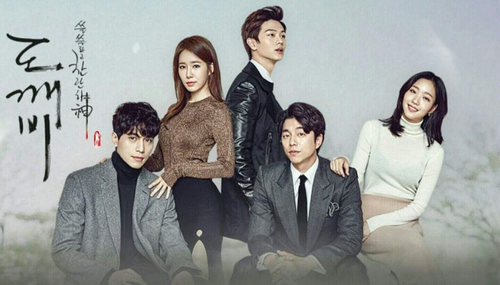

--------------------------------------------------
id: 2598
Titulo: goblin special: the summoning
Sinopsis: Después del final del drama, se hizo otro especial para los fanáticos de Goblin.
Titulos_Alternativos: En
Guionistas: nan
Director: nan
Generos: Documental
Etiquetas: Entre bastidores
Pais: South Korea
Tipo_de_Show: Special
Episodios: 2.0
Fecha_fin: 04/02/2017
Fecha_inicio: 03/02/2017
Anio: 2017.0
Duracion: 01:00:00
Rating: 8.6
Donde_Verlo: Viki Subscription (sub)
Protagonistas: Lee Dong Wook, Yoo In Na, Gong Yoo, Kim Go Eun, Yook Sung Jae
Personajes_secundarios: Jo  Woo Jin, Lee El
portada: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x1D8A0E07390>


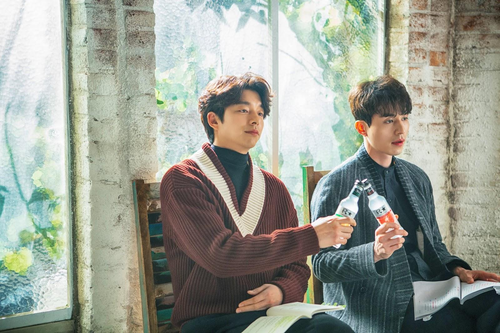

--------------------------------------------------
id: 1189
Titulo: goblin special: every moment of it shined
Sinopsis: Según TVN, este es un episodio especial que explica las complicadas relaciones de los personajes, así como presagian lo que vendrá "para que los espectadores puedan disfrutar de la historia restante con más diversión y facilidad".
Titulos_Alternativos: Goblin - Episodio especial,
Guionistas: nan
Director: nan
Generos: Romance, fantasía
Etiquetas: En
Pais: South Korea
Tipo_de_Show: Special
Episodios: 1.0
Fecha_fin: nan
Fecha_inicio: 14/01/2017
Anio: 2017.0
Duracion: 01:08:00
Rating: 8.3
Donde_Verlo: Viki Subscription (sub)
Protagonistas: Kim Go Eun, Gong Yoo, Lee Dong Wook, Yoo In Na
Personajes_secundarios: Yook Sung Jae, Jo  Woo Jin
portada: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x422 at 0x1D8A4087ED0>


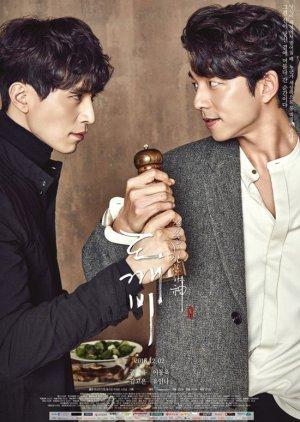

--------------------------------------------------
id: 1890
Titulo: kiss goblin
Sinopsis: Ban Sook es un duende de 160 años que no quiere nada más que ser humano.Pero para hacerlo, su mentor, la Reina Goblin le dice que debe tomar forma humana y besar a los humanos 10 veces.Como es sorprendentemente guapo y posee encanto de otro mundo, esto inicialmente parece una tarea fácil.Sin embargo, pronto descubre que la tarea será más complicada que el primer pensamiento.Cada vez que besa a alguien, desarrolla una nueva emoción humana.¡Y encuentra que cuantas más emociones tiene, más complicado se vuelve el juego de romance!
¡Un exorcista también entra en la escena, amenazando con descarrilar su búsqueda de bien!También conoce a una joven de voluntad fuerte llamada Oh Yeon Ah, que lo ataca y lo reprende después de que ella lo ve besando a un extraño y luego a su mejor amiga.Ban Sook no puede evitar enamorarse de Oh Yeon Ah, pero ¿puede convencerla de sentir lo mismo por él?

(Fuente: Viki)
Titu

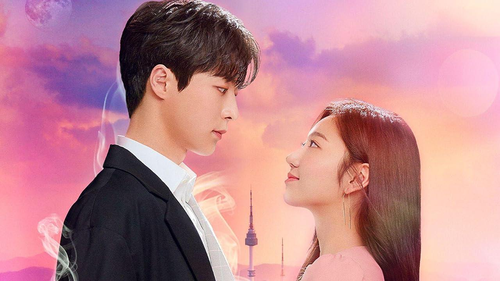

--------------------------------------------------
id: 3337
Titulo: hoshi furu yoru ni
Sinopsis: El ginecólogo de 35 años Yukimiya Suzu trabaja en un hospital en una pacífica ciudad costera.Si bien ayuda a traer nueva vida al mundo, está emocionalmente usada en esta sociedad constrictiva y sofocante y no puede ser vulnerable a nadie.Suzu estudió duro para convertirse en médico, y como resultado de trabajar por dinero y estatus, perdió no solo a los amigos que lucharon con ella, sino también el entusiasmo y los sueños que alguna vez tuvo.Aprendió que la sociedad no siempre está del lado de aquellos que tienen razón, y solo se fatiga si pelea.

Suzu decide ir a acampar solo para tomar un respiro.Mientras bebe alcohol y mira el cielo estrellado, Hiiragi Issei se mueve sin palabras hacia ella y toma una serie de fotos con su cámara.Luego la besa sin previo aviso.A la mañana siguiente, cuando Suzu se despierta, el joven le transmite algo con gestos y hojas con las manos.Este episodio se con

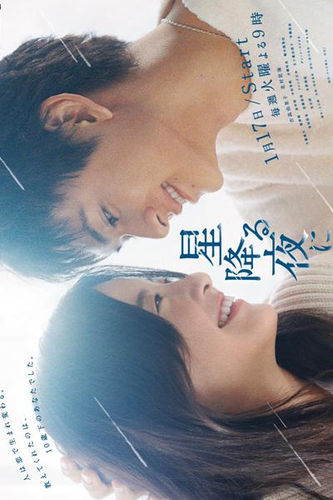

--------------------------------------------------


In [49]:
# Leer el archivo CSV
df_recomendacion = pd.read_csv(output_file)
# Llamada a la función para mostrar información y las imágenes redimensionadas
display_dorama_info(df_recomendacion)

CASO DE USO 2

In [50]:
dorama_title2 = input("Ingrese el titulo:")
print(dorama_title2)

the good bad mother


In [51]:
output_file2 = f"{dorama_title2}_recomendaciones.csv"
save_recommendations(dorama_title2, output_file2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_31688\2303369952.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(tamaño_redimensionado, Image.ANTIALIAS)


id: 337
Titulo: bad guys: city of evil
Sinopsis: Usando tipos malos para atrapar a los malos, un fiscal recluta a un equipo de delincuentes para aplastar una organización corrupta con medidas extremas.

(Fuente: TVN Asia)
Titulos_Alternativos: Bad Guys 2, Bad Guys 2: Age of Evil, Bad Guys: Age of Evil, Bad Guys: Evil City
Guionistas: Han Jung Hoon
Director: Han Dong Hwa
Generos: Acción, misterio, crimen, político
Etiquetas: Fiscal líder masculino, esquema, trabajo en equipo, plomo masculino fuerte, lucha de poder, plomo masculino inteligente, pelea callejera, corrupción, pandilla, venganza
Pais: South Korea
Tipo_de_Show: Drama
Episodios: 16.0
Fecha_fin: 04/02/2018
Fecha_inicio: 16/12/2017
Anio: 2017.0
Duracion: 01:05:00
Rating: 7.7
Donde_Verlo: K-DRAMA Free (sub), Netflix Subscription (sub)
Protagonistas: Yang Ik Jun, Park Joong Hoon, Joo Jin Mo, Kim Mu Yeol, Kim Ji Soo
Personajes_secundarios: Choi Gwi Hwa, Joo Jin Mo, Kim Hong Pa, Jang Shin Young, Song Young Chang, Park Soo Young, Kim

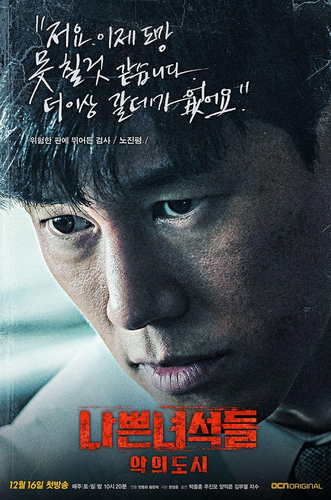

--------------------------------------------------
id: 3896
Titulo: glorious day
Sinopsis: Han Song Jung es un escritor noveloso.También es una madre soltera que ha criado a tres hijas: Da Ae, Da Jung y Da In.Ella lucha por dejar que sus tres hijas se casen con hombres buenos.
Mientras tanto, Seo Jae Woo es el nieto mayor de la familia de al lado, que obtiene ingresos estables como dron corporativo.Aunque ha heredado la naturaleza brusca y conservadora de su abuelo, también recibió cualidades de buen corazón de su padre y es intrínsecamente un buen hombre.
Titulos_Alternativos: Siéntete bien, día, día, un buen día, Giboon Joheun Nal, Kiboon Joteunnal
Guionistas: Moon Hee Jung
Director: Hong Sung Chang
Generos: Comedia, romance, drama
Etiquetas: Relación madre-hija, matrimonio, múltiples parejas, sismancia, amor no correspondido, triángulo amoroso, protagonista femenina dura, protagonista femenina, suegra odiosa, buen protagonista masculino
Pais: South Korea
Tipo_de_Show: Drama
Episodio

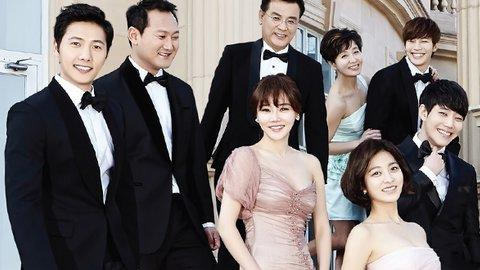

--------------------------------------------------
id: 391
Titulo: wonderful days
Sinopsis: Dong Suk creció como un niño inteligente, pero vino de una pobre experiencia en familia.Ahora es un fiscal exitoso y regresa a su ciudad natal por primera vez en 14 años.Allí, se encuentra con su primer amor, Hae ganó y se enamora de ella de nuevo.
Titulos_Alternativos: Buenos años, temporada maravillosa, buenos momentos, muy buenos tiempos, Cham Joheun Shijul
Guionistas: Lee Kyung Hee
Director: Kim Jin Won
Generos: Romance, drama
Etiquetas: Múltiples parejas, First Love, First Love Returns, regreso a la ciudad natal, amor prohibido, relación familiar, relación multigeneracional, madre-hijo, relación madre-hija, secreto de nacimiento
Pais: South Korea
Tipo_de_Show: Drama
Episodios: 50.0
Fecha_fin: 10/08/2014
Fecha_inicio: 22/02/2014
Anio: 2014.0
Duracion: 01:05:00
Rating: 7.5
Donde_Verlo: KBS World Free (sub)
Protagonistas: Lee Seo Jin, Kim Hee Sun, Ok Taec Yeon, Youn Yuh Jung
Personajes_secunda

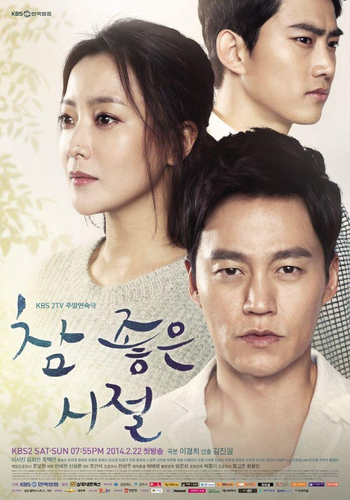

--------------------------------------------------
id: 2185
Titulo: don't say no
Sinopsis: "Si soy esa persona adecuada para ti, entonces a partir de ahora, no puedes decirme que no".

De amigos a amantes.¿Cómo será esta relación, cuando uno es un buen tipo, pero el otro es un chico malo?¿Es posible convertir a un chico malo en un amante?

(Fuente: BL Actualización 2020 Instagram)

~~ Adaptado de la novela "No digas que no cuando los corazones estén cerca" de Mame.
Titulos_Alternativos: DSNTHESERIES, no digas que no la serie: cuando los corazones están muy juntos, muea hua jai klai kan
Guionistas: MAME
Director: Pique Passawut Sukbua
Generos: Romance, juventud, drama, deportes
Etiquetas: Amigos para amantes, LGBTQ+, beso humeado, contenido sexual, baloncesto, romance gay, chantaje, relación madre-hijo, relación padre-hijo, adaptada de una novela
Pais: Thailand
Tipo_de_Show: Drama
Episodios: 12.0
Fecha_fin: 22/10/2021
Fecha_inicio: 06/08/2021
Anio: 2021.0
Duracion: 00:50:00
Rating: 7.6


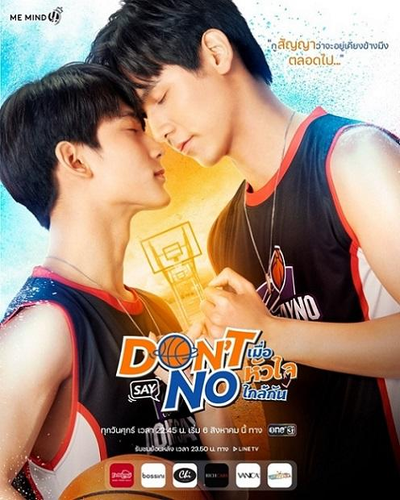

--------------------------------------------------
id: 3508
Titulo: bad buddy - behind the scenes
Sinopsis: "Bad Buddy" detrás de escena.
Titulos_Alternativos: En
Guionistas: nan
Director: nan
Generos: Documental
Etiquetas: Entrevista de elenco, detrás de escena
Pais: Thailand
Tipo_de_Show: Special
Episodios: 13.0
Fecha_fin: 24/01/2022
Fecha_inicio: 01/11/2021
Anio: 2021.0
Duracion: 00:05:00
Rating: 8.6
Donde_Verlo: GMMTV Free (sub)
Protagonistas: Nanon Korapat Kirdpan, Ohm Pawat Chittsawangdee
Personajes_secundarios: Aof Noppharnach Chaiwimol, Jimmy Jitaraphol Potiwihok, Marc Pahun Jiyacharoen, Drake Sattabut Laedeke, Love Pattranite Limpatiyakorn, Au Kornprom Niyomsil
portada: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x500 at 0x1D8A28DAFD0>


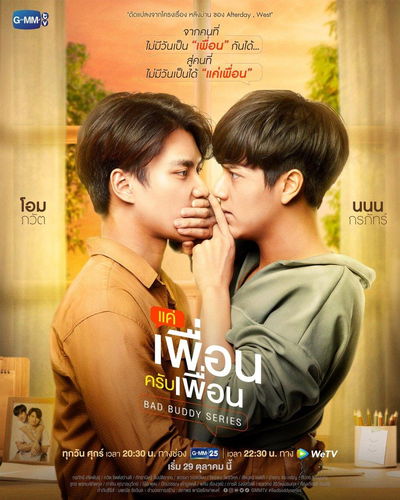

--------------------------------------------------


In [52]:
# Leer el archivo CSV
df_recomendacion2 = pd.read_csv(output_file2)
# Llamada a la función para mostrar información y las imágenes redimensionadas
display_dorama_info(df_recomendacion2)